In [47]:
TARGET_SIZE = 256
RANDOM_SEED = 42
TRAIN_METADATA = './data/train_ship_segmentations_v2.csv'
MODEL_PATH = './model/trained_model.h5'

In [48]:
import helpers
import pandas as pd
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

In [49]:
all_metadata_pd = pd.read_csv(TRAIN_METADATA)
all_metadata = np.array(all_metadata_pd)

In [50]:
def predict(model, row):
	path = helpers.get_image_path(row[0])
	image = Image.open(path)
	squares = helpers.cut_image(image, TARGET_SIZE)
	inputs = squares * 1.0 / 255
	masks = model.predict(inputs, verbose=0)
	single_mask = helpers.join_images(masks, TARGET_SIZE, image.size)
	return (row[0], image, single_mask) 

In [51]:
def render_images(images):
	num_images = len(images)
	num_rows = (num_images + 3) // 4  # Calculate the number of rows needed

	fig, axes = plt.subplots(num_rows, 4, figsize=(12, 12))
	axes = axes.flatten()  # Flatten the axes array for easier indexing

	for i, (title, image, mask) in enumerate(images):
		ax = axes[i]
		ax.imshow(image)
		ax.imshow(mask, alpha=0.3, cmap='jet')  # Display mask as an overlay
		ax.set_title(title)
		ax.axis('off')
		
	# Remove unused subplots
	for j in range(i+1, num_rows * 4):
		fig.delaxes(axes[j])
		
	plt.tight_layout()
	plt.show()


In [52]:
from tensorflow.keras.models import load_model

# Load the h5 model file
model = load_model(MODEL_PATH, compile=False)

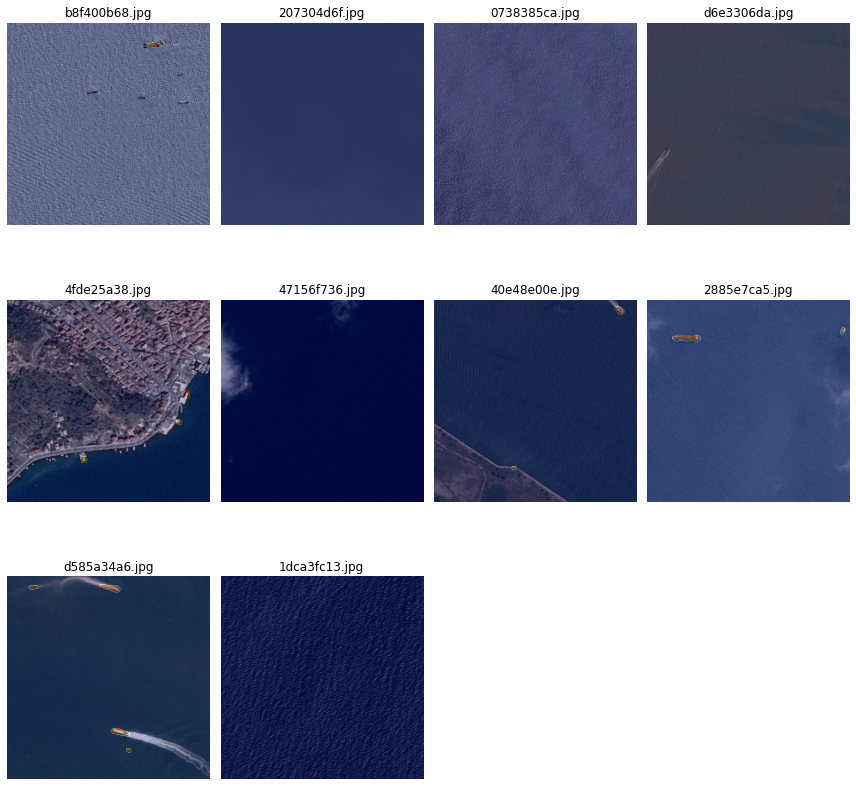

In [53]:

random.seed(RANDOM_SEED)
random_images = random.sample(list(all_metadata), 10)
predictions = list(map(lambda row: predict(model, row), random_images))
render_images(predictions)